In [ ]:
import numpy as np
import pandas as pd
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import stopwords and text processing libraries
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#import machine learning libraries
import sklearn

In [ ]:
# Read csv file of cnbc headlines using pandas

cnbc = pd.read_csv('/content/drive/MyDrive/cnbc_news_datase.csv')

In [ ]:
cnbc.head()

,index,title,url,published_at,author,publisher,short_description,keywords,header_image,raw_description,description,scraped_at
0,0,Santoli’s Wednesday market notes: Could Septem...,https://www.cnbc.com/2021/09/29/santolis-wedne...,2021-09-29T17:09:39+0000,Michael Santoli,CNBC,"This is the daily notebook of Mike Santoli, CN...","cnbc, Premium, Articles, Investment strategy, ...",https://image.cnbcfm.com/api/v1/image/10694960...,"<div class=""group""><p><em>This is the daily no...","This is the daily notebook of Mike Santoli, CN...",2021-10-30 14:11:23.709372
1,1,My take on the early Brexit winners and losers,https://www.cnbc.com/2016/06/24/ian-bremmers-t...,2016-06-24T13:50:48-0400,NaN,CNBC,This commentary originally ran on Facebook. Bo...,"Articles, Politics, Europe News, European Cent...",https://fm.cnbc.com/applications/cnbc.com/reso...,NaN,NaN,2021-10-30 14:11:23.820139
2,2,Europe&#039;s recovery depends on Renzi&#039;s...,https://www.cnbc.com/2014/03/25/europes-recove...,2014-03-25T13:29:45-0400,NaN,CNBC,"In spring, ambitious reforms began in Italy. U...","Articles, Business News, Economy, Europe Econo...",https://fm.cnbc.com/applications/cnbc.com/reso...,NaN,NaN,2021-10-30 14:11:23.854710
3,3,US Moves Closer to Becoming A Major Shareholde...,https://www.cnbc.com/2009/04/22/us-moves-close...,2009-04-22T19:49:03+0000,Michelle Caruso-Cabrera,CNBC,The US government is increasingly likely to co...,"cnbc, Articles, General Motors Co, Business Ne...",https://image.cnbcfm.com/api/v1/image/24947979...,"<div class=""group""><p>The US government is inc...",The US government is increasingly likely to co...,2021-10-30 14:11:24.261143
4,4,Trump: 'Mission accomplished' on 'perfectly ex...,https://www.cnbc.com/2018/04/14/trump-mission-...,2018-04-14T14:59:04+0000,Javier E. David,CNBC,NaN,"cnbc, Articles, George W. Bush, Vladimir Putin...",https://image.cnbcfm.com/api/v1/image/10513177...,"<div class=""group""></div>,<div class=""group""><...",President Donald Trump hailed the U.S.-led int...,2021-10-30 14:11:24.489490


In [ ]:
# keeping title,published_at and short_description, drop all remaining columns

cnbc_new = cnbc.drop(['index', 'url', 'author','publisher','keywords','header_image','raw_description','description','scraped_at'], axis=1)
cnbc_new.head()

,title,published_at,short_description
0,Santoli’s Wednesday market notes: Could Septem...,2021-09-29T17:09:39+0000,"This is the daily notebook of Mike Santoli, CN..."
1,My take on the early Brexit winners and losers,2016-06-24T13:50:48-0400,This commentary originally ran on Facebook. Bo...
2,Europe&#039;s recovery depends on Renzi&#039;s...,2014-03-25T13:29:45-0400,"In spring, ambitious reforms began in Italy. U..."
3,US Moves Closer to Becoming A Major Shareholde...,2009-04-22T19:49:03+0000,The US government is increasingly likely to co...
4,Trump: 'Mission accomplished' on 'perfectly ex...,2018-04-14T14:59:04+0000,NaN


In [ ]:
## check the shape of cnbc dataset
cnbc_new.shape

(625, 3)

In [ ]:
# Checking all the columns in the cnbc dataset

cnbc_new.columns

Index(['title', 'published_at', 'short_description'], dtype='object')

In [ ]:
# Check which columns are having categorical, numerical or boolean values

cnbc_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              625 non-null    object
 1   published_at       625 non-null    object
 2   short_description  609 non-null    object
dtypes: object(3)
memory usage: 14.8+ KB


In [ ]:
# Check for missing values in all the columnns of cnbc dataset

cnbc_new.isnull().sum()

title                 0
published_at          0
short_description    16
dtype: int64

In [ ]:
# drop nan values in cnbc dataset
cnbc_new.dropna(inplace=True)

In [ ]:
cnbc_new.reset_index(inplace=True, drop=True)

In [ ]:
cnbc_new

,title,published_at,short_description
0,Santoli’s Wednesday market notes: Could Septem...,2021-09-29T17:09:39+0000,"This is the daily notebook of Mike Santoli, CN..."
1,My take on the early Brexit winners and losers,2016-06-24T13:50:48-0400,This commentary originally ran on Facebook. Bo...
2,Europe&#039;s recovery depends on Renzi&#039;s...,2014-03-25T13:29:45-0400,"In spring, ambitious reforms began in Italy. U..."
3,US Moves Closer to Becoming A Major Shareholde...,2009-04-22T19:49:03+0000,The US government is increasingly likely to co...
4,Chevron CEO Watson says he supports Trump on t...,2017-03-07T23:07:14+0000,Chevron Chief Executive John Watson told CNBC ...
...,...,...,...
604,Prepare for an Oil Shock With Currencies,2012-03-26T14:01:53+0000,There is a lot of tough talk emanating from th...
605,Cash-Hungry States Are Putting Buildings on th...,2010-05-05T17:16:33+0000,Is it better to rent or to own?The default ans...
606,Since 2009 every time stocks have 3-week losin...,2019-05-29T15:11:51+0000,Stocks began the truncated trading week after ...
607,Here are some ways to play the 'stay-at-home' ...,2020-05-02T16:57:58+0000,"With millions working and learning from home, ..."


In [ ]:
cnbc_new.isnull().sum()

title                0
published_at         0
short_description    0
dtype: int64

In [ ]:
# checking whether duplicate records are present

dup_list = list(cnbc_new.duplicated(keep='first').values)
dup_list.count(True)

0

In [ ]:
# drop the duplicate rows in the dataset keep the first one
cnbc_new.drop_duplicates(keep='first', inplace=True)

In [ ]:
# check the shape of cnbc dataset
cnbc_new.shape

(609, 3)

#Supporting functions for further data processing and Modelling

Preprocessing

In [ ]:
# creating a function for preprocessing

def preprocessing_text(data):

    #convert all to lowercase
    data = data.lower()


    #removing puntuations
    data = re.sub(r'[^\w\s]','', data, flags=re.MULTILINE)


    #remove stopwords
    tokens = word_tokenize(data)
    word_tokens = [w for w in tokens if w not in stopwords]


    #stemming
    stemmer = PorterStemmer()
    stem_words = [stemmer.stem(w) for w in word_tokens]


    #lemmitizing
    lemmer = WordNetLemmatizer()
    lem_words = [lemmer.lemmatize(w) for w in stem_words]

    return " ".join(lem_words)


SENTIMENT ANAYSIS

In [ ]:
# import sentiment intensity analyzer

nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# create sentiment intensity analyzer object
SIA = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# fuction to  decide sentiment as positive, negative and neutral

def mapper(data):
    if data > 0:
        return "Positive"
    elif data < 0:
        return "Negative"
    else:
        return "Neutral"

def sentiment_analysis(df, colm_name):

    # assigning polarity scores for description column
    df['polarity_scores'] = df[colm_name].apply(lambda w: SIA.polarity_scores(w))

    # picking only compound score(combined score)
    df['compound_score'] = df['polarity_scores'].apply(lambda x: x['compound'])

    # mapping the compound score to positive, negative or neutral
    df['ds_score'] = df['compound_score'].apply(mapper)

    df.drop(['polarity_scores', 'compound_score'], axis=1, inplace=True)

    return df

#Now working with description on dataset

In [ ]:
#make a copy of new dataset

cnbc_copy = cnbc_new.copy()

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# apply preprocessing to the description of new dataset

cnbc_copy['short_description'] = cnbc_copy['short_description'].apply(preprocessing_text)
cnbc_copy

,title,published_at,short_description
0,Santoli’s Wednesday market notes: Could Septem...,2021-09-29T17:09:39+0000,daili notebook mike santoli cnbc senior market...
1,My take on the early Brexit winners and losers,2016-06-24T13:50:48-0400,commentari origin ran facebook bori johnson fo...
2,Europe&#039;s recovery depends on Renzi&#039;s...,2014-03-25T13:29:45-0400,spring ambiti reform began itali matteo renzi ...
3,US Moves Closer to Becoming A Major Shareholde...,2009-04-22T19:49:03+0000,u govern increasingli like convert 134 billion...
4,Chevron CEO Watson says he supports Trump on t...,2017-03-07T23:07:14+0000,chevron chief execut john watson told cnbc tue...
...,...,...,...
604,Prepare for an Oil Shock With Currencies,2012-03-26T14:01:53+0000,lot tough talk eman middl east here currencytr...
605,Cash-Hungry States Are Putting Buildings on th...,2010-05-05T17:16:33+0000,better rent ownth default answer long time rea...
606,Since 2009 every time stocks have 3-week losin...,2019-05-29T15:11:51+0000,stock began truncat trade week memori day neg ...
607,Here are some ways to play the 'stay-at-home' ...,2020-05-02T16:57:58+0000,million work learn home exchangetrad fund issu...


In [ ]:
# apply the function  which decides sentiment to  polarity score column

df = sentiment_analysis(cnbc_copy, 'short_description')
df

,title,published_at,short_description,ds_score
0,Santoli’s Wednesday market notes: Could Septem...,2021-09-29T17:09:39+0000,daili notebook mike santoli cnbc senior market...,Neutral
1,My take on the early Brexit winners and losers,2016-06-24T13:50:48-0400,commentari origin ran facebook bori johnson fo...,Positive
2,Europe&#039;s recovery depends on Renzi&#039;s...,2014-03-25T13:29:45-0400,spring ambiti reform began itali matteo renzi ...,Negative
3,US Moves Closer to Becoming A Major Shareholde...,2009-04-22T19:49:03+0000,u govern increasingli like convert 134 billion...,Negative
4,Chevron CEO Watson says he supports Trump on t...,2017-03-07T23:07:14+0000,chevron chief execut john watson told cnbc tue...,Positive
...,...,...,...,...
604,Prepare for an Oil Shock With Currencies,2012-03-26T14:01:53+0000,lot tough talk eman middl east here currencytr...,Positive
605,Cash-Hungry States Are Putting Buildings on th...,2010-05-05T17:16:33+0000,better rent ownth default answer long time rea...,Positive
606,Since 2009 every time stocks have 3-week losin...,2019-05-29T15:11:51+0000,stock began truncat trade week memori day neg ...,Positive
607,Here are some ways to play the 'stay-at-home' ...,2020-05-02T16:57:58+0000,million work learn home exchangetrad fund issu...,Positive


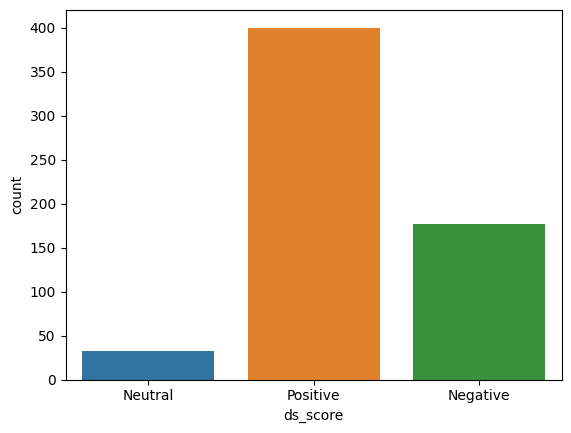

In [ ]:
# plot a count plot on description score column

sns.countplot(x='ds_score', data=df);

In the description

there are approximately

400 positive statment

160 negative statment

40 neutral statment

In [ ]:
df['ds_score'].value_counts()

Positive    400
Negative    177
Neutral      32
Name: ds_score, dtype: int64

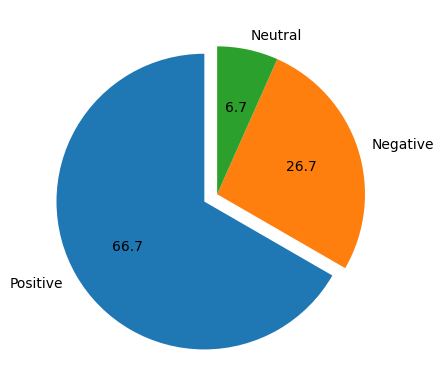

In [ ]:
# pie chart on description score column

plt.pie([400, 160, 40], explode=[0.1,0,0], labels=['Positive','Negative','Neutral'], autopct='%.1f', startangle=90)
plt.show()

In the dataset

description contains

66.7% positive statments

26.7% negtive statements

6.7% neutral statments

#Modelling on description based dataset

In [ ]:
df

,title,published_at,short_description,ds_score
0,Santoli’s Wednesday market notes: Could Septem...,2021-09-29T17:09:39+0000,daili notebook mike santoli cnbc senior market...,Neutral
1,My take on the early Brexit winners and losers,2016-06-24T13:50:48-0400,commentari origin ran facebook bori johnson fo...,Positive
2,Europe&#039;s recovery depends on Renzi&#039;s...,2014-03-25T13:29:45-0400,spring ambiti reform began itali matteo renzi ...,Negative
3,US Moves Closer to Becoming A Major Shareholde...,2009-04-22T19:49:03+0000,u govern increasingli like convert 134 billion...,Negative
4,Chevron CEO Watson says he supports Trump on t...,2017-03-07T23:07:14+0000,chevron chief execut john watson told cnbc tue...,Positive
...,...,...,...,...
604,Prepare for an Oil Shock With Currencies,2012-03-26T14:01:53+0000,lot tough talk eman middl east here currencytr...,Positive
605,Cash-Hungry States Are Putting Buildings on th...,2010-05-05T17:16:33+0000,better rent ownth default answer long time rea...,Positive
606,Since 2009 every time stocks have 3-week losin...,2019-05-29T15:11:51+0000,stock began truncat trade week memori day neg ...,Positive
607,Here are some ways to play the 'stay-at-home' ...,2020-05-02T16:57:58+0000,million work learn home exchangetrad fund issu...,Positive


In [ ]:
# split the dataset  into test and train

from sklearn.model_selection import train_test_split

X = df['short_description']
y = df.ds_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=212)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(548,) (61,) (548,) (61,)


Let's try to apply some of known Machine learning classification algorithms and compare their performances

#LINEAR SUPPORT VECTOR MACHINE

In [ ]:
%%time
# pipeline creation
# 1. tfidVectorization
# 2. linearSVC model

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report,f1_score


# Fit the pipeline to the data
lin_svc_ds = Pipeline([('tfidf', TfidfVectorizer()),
                      ('lin_svc', LinearSVC())])

lin_svc_ds.fit(X_train, y_train)

# predict on test dataset
pred = lin_svc_ds.predict(X_test)

print("MODEL: LINEAR SVC")

# print accuracy score
print("accuarcy score: ", accuracy_score(y_test, pred))

#print confusion matrix
print("Confusion matrix: ", confusion_matrix(y_test, pred))

#print classification report
print(classification_report(y_test, pred))

MODEL: LINEAR SVC
accuarcy score:  0.7704918032786885
Confusion matrix:  [[ 9  0  8]
 [ 0  0  3]
 [ 2  1 38]]
              precision    recall  f1-score   support

    Negative       0.82      0.53      0.64        17
     Neutral       0.00      0.00      0.00         3
    Positive       0.78      0.93      0.84        41

    accuracy                           0.77        61
   macro avg       0.53      0.49      0.50        61
weighted avg       0.75      0.77      0.75        61

CPU times: user 76.2 ms, sys: 884 µs, total: 77 ms
Wall time: 76.6 ms


#LOGISTIC REGRESSION

In [ ]:
%%time
# pipeline creation
# 1. CountVectorization
# 2. TfidTransformer
# 3. Logistic Regression

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression


# Fit the pipeline to the data
log_reg_ds = Pipeline([('count_vec', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('log_reg', LogisticRegression())])

log_reg_ds.fit(X_train, y_train)

# predict on test dataset
pred = log_reg_ds.predict(X_test)

print("MODEL: LOGISTIC REGRESSION")

# print accuracy score
print("accuarcy score: ", accuracy_score(y_test, pred))

#print confusion matrix
print("Confusion matrix: ", confusion_matrix(y_test, pred))

#print classification report
print(classification_report(y_test, pred))

MODEL: LOGISTIC REGRESSION
accuarcy score:  0.7377049180327869
Confusion matrix:  [[ 4  0 13]
 [ 0  0  3]
 [ 0  0 41]]
              precision    recall  f1-score   support

    Negative       1.00      0.24      0.38        17
     Neutral       0.00      0.00      0.00         3
    Positive       0.72      1.00      0.84        41

    accuracy                           0.74        61
   macro avg       0.57      0.41      0.41        61
weighted avg       0.76      0.74      0.67        61

CPU times: user 251 ms, sys: 122 ms, total: 372 ms
Wall time: 231 ms


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#MULTINOMIAL NAIVE BAYES

In [ ]:
%%time
# pipeline creation
# 1. CountVectorizer
# 2. TfidTransformer
# 3. MultinomialNB

from sklearn.naive_bayes import MultinomialNB


# Fit the pipeline to the data
multi_nb_ds = Pipeline([('count_vec', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('multi_nb', MultinomialNB())])

multi_nb_ds.fit(X_train, y_train)

# predict on test dataset
pred = multi_nb_ds.predict(X_test)

print("MODEL: Multinomial NB")

# print accuracy score
print("accuarcy score: ", accuracy_score(y_test, pred))

#print confusion matrix
print("Confusion matrix: ", confusion_matrix(y_test, pred))

#print classification report
print(classification_report(y_test, pred))

MODEL: Multinomial NB
accuarcy score:  0.6721311475409836
Confusion matrix:  [[ 0  0 17]
 [ 0  0  3]
 [ 0  0 41]]
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        17
     Neutral       0.00      0.00      0.00         3
    Positive       0.67      1.00      0.80        41

    accuracy                           0.67        61
   macro avg       0.22      0.33      0.27        61
weighted avg       0.45      0.67      0.54        61

CPU times: user 87.2 ms, sys: 0 ns, total: 87.2 ms
Wall time: 87.4 ms


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#BERNOULLI NAIVE BAYES

In [ ]:
%%time
# pipeline creation
# 1. CountVectorizer
# 2. TfidTransformer
# 3. BernoulliNB

from sklearn.naive_bayes import BernoulliNB


# Fit the pipeline to the data
bern_nb_ds = Pipeline([('count_vec', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('bern_nb', BernoulliNB())])

bern_nb_ds.fit(X_train, y_train)

# predict on test dataset
pred = bern_nb_ds.predict(X_test)

print("MODEL: Bernoulli's NB")

# print accuracy score
print("accuarcy score: ", accuracy_score(y_test, pred))

#print confusion matrix
print("Confusion matrix: ", confusion_matrix(y_test, pred))

#print classification report
print(classification_report(y_test, pred))

MODEL: Bernoulli's NB
accuarcy score:  0.6721311475409836
Confusion matrix:  [[ 1  0 16]
 [ 0  0  3]
 [ 1  0 40]]
              precision    recall  f1-score   support

    Negative       0.50      0.06      0.11        17
     Neutral       0.00      0.00      0.00         3
    Positive       0.68      0.98      0.80        41

    accuracy                           0.67        61
   macro avg       0.39      0.34      0.30        61
weighted avg       0.60      0.67      0.57        61

CPU times: user 78.5 ms, sys: 0 ns, total: 78.5 ms
Wall time: 78.6 ms


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#GRADIENT BOOSTING CLASSIFICATION MODEL

In [ ]:
%%time
# pipeline creation
# 1. CountVectorizer
# 2. TfidTransformer
# 3. GradientBoostingClassifier

from sklearn.ensemble import GradientBoostingClassifier


# Fit the pipeline to the data
grad_boost_ds = Pipeline([('count_vec', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('grad_boost', GradientBoostingClassifier())])

grad_boost_ds.fit(X_train, y_train)

# predict on test dataset
pred = grad_boost_ds.predict(X_test)

print("MODEL: Gradient Boosting")

# print accuracy score
print("accuarcy score: ", accuracy_score(y_test, pred))

#print confusion matrix
print("Confusion matrix: ", confusion_matrix(y_test, pred))

#print classification report
print(classification_report(y_test, pred))

MODEL: Gradient Boosting
accuarcy score:  0.7704918032786885
Confusion matrix:  [[10  0  7]
 [ 0  1  2]
 [ 3  2 36]]
              precision    recall  f1-score   support

    Negative       0.77      0.59      0.67        17
     Neutral       0.33      0.33      0.33         3
    Positive       0.80      0.88      0.84        41

    accuracy                           0.77        61
   macro avg       0.63      0.60      0.61        61
weighted avg       0.77      0.77      0.76        61

CPU times: user 4.36 s, sys: 135 µs, total: 4.36 s
Wall time: 4.38 s


#XGBOOST CLASSIFICATION MODEL

In [ ]:
%%time
# pipeline creation
# 1. CountVectorizer
# 2. TfidTransformer
# 3. XGBClassifier

from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder


# Fit the pipeline to the data
xg_boost_ds = Pipeline([('count_vec', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('xgb', XGBClassifier())])

encoder = LabelEncoder()
enc_train = encoder.fit_transform(y_train)
enc_test = encoder.fit_transform(y_test)

xg_boost_ds.fit(X_train, enc_train)

# predict on test dataset
pred = xg_boost_ds.predict(X_test)

print("MODEL: XG Boost")

# print accuracy score
print("accuarcy score: ", accuracy_score(enc_test, pred))

#print confusion matrix
print("Confusion matrix: ", confusion_matrix(enc_test, pred))

#print classification report
print(classification_report(enc_test, pred))

MODEL: XG Boost
accuarcy score:  0.6721311475409836
Confusion matrix:  [[ 5  0 12]
 [ 2  1  0]
 [ 4  2 35]]
              precision    recall  f1-score   support

           0       0.45      0.29      0.36        17
           1       0.33      0.33      0.33         3
           2       0.74      0.85      0.80        41

    accuracy                           0.67        61
   macro avg       0.51      0.49      0.50        61
weighted avg       0.64      0.67      0.65        61

CPU times: user 5.74 s, sys: 925 µs, total: 5.74 s
Wall time: 3.03 s


Metrics comparison for above models (performance measurement)

In [ ]:
# helper function for comparing models matric

def metrics_comparison(model_objects, model_names, X_test, y_test, enc_test):

    # create a dataframe with column matric and metric name as value
    metrics_df = pd.DataFrame(columns=['model_names','accuracy','precision','recall','f1_score'])
    metrics_df['model_names'] = model_names

    # then predict on the test set
    metrics_df['accuracy'] = [accuracy_score(y_test, model.predict(X_test)) if model != xg_boost_ds else accuracy_score(enc_test, model.predict(X_test)) for model in model_objects]
    metrics_df['precision'] = [precision_score(y_test, model.predict(X_test),average='weighted') if model != xg_boost_ds else precision_score(enc_test, model.predict(X_test), average='weighted') for model in model_objects]
    metrics_df['recall'] = [recall_score(y_test, model.predict(X_test),average='weighted') if model != xg_boost_ds else recall_score(enc_test, model.predict(X_test),average='weighted') for model in model_objects]
    metrics_df['f1_score'] = [f1_score(y_test, model.predict(X_test),average='weighted') if model != xg_boost_ds else f1_score(enc_test, model.predict(X_test), average='weighted') for model in model_objects]

    return metrics_df

In [ ]:
# list of model objects
model_objects = [lin_svc_ds, log_reg_ds, multi_nb_ds, bern_nb_ds, grad_boost_ds, xg_boost_ds]

# list of model names
model_names = ['LinearSVC', 'LogRegression','MultinomialNB','BernoulliNB','GradientBoost','XGBoost']

# print the comparison of models
met_df = metrics_comparison(model_objects,model_names, X_test, y_test, enc_test)
met_df

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,model_names,accuracy,precision,recall,f1_score
0,LinearSVC,0.770492,0.749262,0.770492,0.746734
1,LogRegression,0.737705,0.762151,0.737705,0.668563
2,MultinomialNB,0.672131,0.451760,0.672131,0.540341
3,BernoulliNB,0.672131,0.595026,0.672131,0.567041
4,GradientBoost,0.770492,0.768474,0.770492,0.764900
5,XGBoost,0.672131,0.643593,0.672131,0.650575


From above metrics comparison, we could confirm that Linear SVC model performs better than all other models

#working with test dataset

In [ ]:
# Perforn the prediction on the test dataset
pred = lin_svc_ds.predict(X_test)
pred

array(['Positive', 'Negative', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Negative', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Negative', 'Positive', 'Negative', 'Positive',
       'Positive', 'Positive', 'Negative', 'Positive', 'Positive',
       'Positive', 'Negative', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Negative',
       'Negative', 'Positive', 'Neutral', 'Positive', 'Positive',
       'Positive', 'Negative', 'Negative', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Negative', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive'], dtype=object)

In [ ]:
# creating a dataframe of predicted results
pred = pd.DataFrame(pred, columns=['predictions'])

In [ ]:
pred

,predictions
0,Positive
1,Negative
2,Positive
3,Positive
4,Positive
...,...
56,Positive
57,Positive
58,Positive
59,Positive


After working alone with description, we could get above performance from the respective alogrithms.

Now we will try to increase our text content by concatenating titles and description column and training the models on the combined data

#Now working with headlines + description

In [ ]:
cnbc_new

,title,published_at,short_description
0,Santoli’s Wednesday market notes: Could Septem...,2021-09-29T17:09:39+0000,"This is the daily notebook of Mike Santoli, CN..."
1,My take on the early Brexit winners and losers,2016-06-24T13:50:48-0400,This commentary originally ran on Facebook. Bo...
2,Europe&#039;s recovery depends on Renzi&#039;s...,2014-03-25T13:29:45-0400,"In spring, ambitious reforms began in Italy. U..."
3,US Moves Closer to Becoming A Major Shareholde...,2009-04-22T19:49:03+0000,The US government is increasingly likely to co...
4,Chevron CEO Watson says he supports Trump on t...,2017-03-07T23:07:14+0000,Chevron Chief Executive John Watson told CNBC ...
...,...,...,...
604,Prepare for an Oil Shock With Currencies,2012-03-26T14:01:53+0000,There is a lot of tough talk emanating from th...
605,Cash-Hungry States Are Putting Buildings on th...,2010-05-05T17:16:33+0000,Is it better to rent or to own?The default ans...
606,Since 2009 every time stocks have 3-week losin...,2019-05-29T15:11:51+0000,Stocks began the truncated trading week after ...
607,Here are some ways to play the 'stay-at-home' ...,2020-05-02T16:57:58+0000,"With millions working and learning from home, ..."


In [ ]:
# merge headlines and description of new dataset and name it info

cnbc_new['info'] = cnbc_new['title'] + ' ' + cnbc_new['short_description']
cnbc_new.head()

,title,published_at,short_description,info
0,Santoli’s Wednesday market notes: Could Septem...,2021-09-29T17:09:39+0000,"This is the daily notebook of Mike Santoli, CN...",Santoli’s Wednesday market notes: Could Septem...
1,My take on the early Brexit winners and losers,2016-06-24T13:50:48-0400,This commentary originally ran on Facebook. Bo...,My take on the early Brexit winners and losers...
2,Europe&#039;s recovery depends on Renzi&#039;s...,2014-03-25T13:29:45-0400,"In spring, ambitious reforms began in Italy. U...",Europe&#039;s recovery depends on Renzi&#039;s...
3,US Moves Closer to Becoming A Major Shareholde...,2009-04-22T19:49:03+0000,The US government is increasingly likely to co...,US Moves Closer to Becoming A Major Shareholde...
4,Chevron CEO Watson says he supports Trump on t...,2017-03-07T23:07:14+0000,Chevron Chief Executive John Watson told CNBC ...,Chevron CEO Watson says he supports Trump on t...


In [ ]:
# keeping info and time column, drop all remaining columns

cnbc_data = cnbc_new.drop(['title', 'short_description'], axis=1)
cnbc_data.head()

,published_at,info
0,2021-09-29T17:09:39+0000,Santoli’s Wednesday market notes: Could Septem...
1,2016-06-24T13:50:48-0400,My take on the early Brexit winners and losers...
2,2014-03-25T13:29:45-0400,Europe&#039;s recovery depends on Renzi&#039;s...
3,2009-04-22T19:49:03+0000,US Moves Closer to Becoming A Major Shareholde...
4,2017-03-07T23:07:14+0000,Chevron CEO Watson says he supports Trump on t...


In [ ]:
# apply preprocessing on info column

cnbc_data['info'] = cnbc_data['info'].apply(preprocessing_text)
cnbc_data

,published_at,info
0,2021-09-29T17:09:39+0000,santoli wednesday market note could septemb st...
1,2016-06-24T13:50:48-0400,take earli brexit winner loser commentari orig...
2,2014-03-25T13:29:45-0400,europe039 recoveri depend renzi039 itali sprin...
3,2009-04-22T19:49:03+0000,u move closer becom major sharehold gm u gover...
4,2017-03-07T23:07:14+0000,chevron ceo watson say support trump tax refor...
...,...,...
604,2012-03-26T14:01:53+0000,prepar oil shock currenc lot tough talk eman m...
605,2010-05-05T17:16:33+0000,cashhungri state put build block better rent o...
606,2019-05-29T15:11:51+0000,sinc 2009 everi time stock 3week lose streak m...
607,2020-05-02T16:57:58+0000,way play stayathom theme use etf market analys...


In [ ]:
# apply the function  which decides sentiment to  polarity score column

cnbc_data = sentiment_analysis(cnbc_data, 'info')
cnbc_data

,published_at,info,ds_score
0,2021-09-29T17:09:39+0000,santoli wednesday market note could septemb st...,Positive
1,2016-06-24T13:50:48-0400,take earli brexit winner loser commentari orig...,Positive
2,2014-03-25T13:29:45-0400,europe039 recoveri depend renzi039 itali sprin...,Negative
3,2009-04-22T19:49:03+0000,u move closer becom major sharehold gm u gover...,Negative
4,2017-03-07T23:07:14+0000,chevron ceo watson say support trump tax refor...,Positive
...,...,...,...
604,2012-03-26T14:01:53+0000,prepar oil shock currenc lot tough talk eman m...,Negative
605,2010-05-05T17:16:33+0000,cashhungri state put build block better rent o...,Positive
606,2019-05-29T15:11:51+0000,sinc 2009 everi time stock 3week lose streak m...,Negative
607,2020-05-02T16:57:58+0000,way play stayathom theme use etf market analys...,Positive


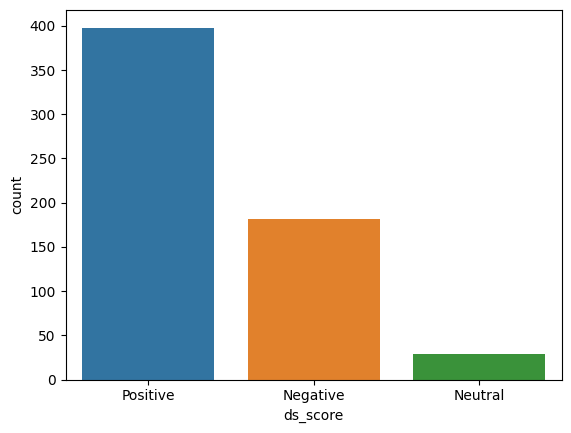

In [ ]:
# perform count plot on info_score column

sns.countplot(x='ds_score', data=cnbc_data);

In the info

there are approx

400 positive statment

160 negative statment

40 neutral statment

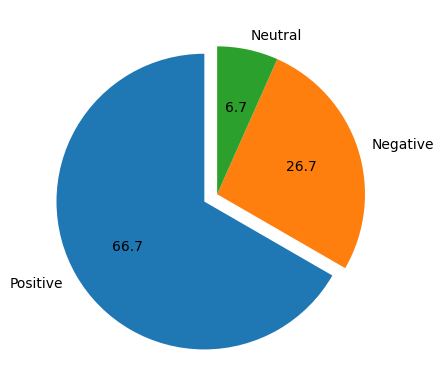

In [ ]:
# perform pie chart on info_score column

plt.pie([400, 160, 40], explode=[0.1,0,0], labels=['Positive','Negative','Neutral'], autopct='%.1f', startangle=90)
plt.show()

In the dataset

info contains

66.7% positive statments

26.7% negtive statements

6.7% neutral statments

#modeling on headlines + description

In [ ]:
# split the dataset  into test and train


X = cnbc_data['info']
y = cnbc_data.ds_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=212)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(548,) (61,) (548,) (61,)


#LINEAR SUPPORT VECTOR MACHINE

In [ ]:
%%time
# pipeline creation
# 1. tfidVectorization
# 2. linearSVC model


# Fit the pipeline to the data
lin_svc_info = Pipeline([('tfidf', TfidfVectorizer()),
                      ('lin_svc', LinearSVC())])

lin_svc_info.fit(X_train, y_train)

# predict on test dataset
pred = lin_svc_info.predict(X_test)

print("MODEL: LINEAR SVC")

# print accuracy score
print("accuarcy score: ", accuracy_score(y_test, pred))

#print confusion matrix
print("Confusion matrix: ", confusion_matrix(y_test, pred))

#print classification report
print(classification_report(y_test, pred))

MODEL: LINEAR SVC
accuarcy score:  0.7540983606557377
Confusion matrix:  [[ 7  0  7]
 [ 0  0  3]
 [ 4  1 39]]
              precision    recall  f1-score   support

    Negative       0.64      0.50      0.56        14
     Neutral       0.00      0.00      0.00         3
    Positive       0.80      0.89      0.84        44

    accuracy                           0.75        61
   macro avg       0.48      0.46      0.47        61
weighted avg       0.72      0.75      0.73        61

CPU times: user 160 ms, sys: 745 µs, total: 161 ms
Wall time: 185 ms


#LOGISTIC REGRESSION

In [ ]:
%%time
# pipeline creation
# 1. CountVectorization
# 2. TfidTransformer
# 3. Logistic Regression


# Fit the pipeline to the data
log_reg_info = Pipeline([('count_vec', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('log_reg', LogisticRegression())])

log_reg_info.fit(X_train, y_train)

# predict on test dataset
pred = log_reg_info.predict(X_test)

print("MODEL: LOGISTIC REGRESSION")

# print accuracy score
print("accuarcy score: ", accuracy_score(y_test, pred))

#print confusion matrix
print("Confusion matrix: ", confusion_matrix(y_test, pred))

#print classification report
print(classification_report(y_test, pred))

MODEL: LOGISTIC REGRESSION
accuarcy score:  0.7213114754098361
Confusion matrix:  [[ 3  0 11]
 [ 0  0  3]
 [ 3  0 41]]
              precision    recall  f1-score   support

    Negative       0.50      0.21      0.30        14
     Neutral       0.00      0.00      0.00         3
    Positive       0.75      0.93      0.83        44

    accuracy                           0.72        61
   macro avg       0.42      0.38      0.38        61
weighted avg       0.65      0.72      0.67        61

CPU times: user 313 ms, sys: 322 ms, total: 635 ms
Wall time: 372 ms


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#MULTINOMIAL NAIVE BAYES

In [ ]:
%%time
# pipeline creation
# 1. CountVectorizer
# 2. TfidTransformer
# 3. MultinomialNB


# Fit the pipeline to the data
multi_nb_info = Pipeline([('count_vec', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('multi_nb', MultinomialNB())])

multi_nb_info.fit(X_train, y_train)

# predict on test dataset
pred = multi_nb_info.predict(X_test)

print("MODEL: Multinomial NB")

# print accuracy score
print("accuarcy score: ", accuracy_score(y_test, pred))

#print confusion matrix
print("Confusion matrix: ", confusion_matrix(y_test, pred))

#print classification report
print(classification_report(y_test, pred))

MODEL: Multinomial NB
accuarcy score:  0.7213114754098361
Confusion matrix:  [[ 0  0 14]
 [ 0  0  3]
 [ 0  0 44]]
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        14
     Neutral       0.00      0.00      0.00         3
    Positive       0.72      1.00      0.84        44

    accuracy                           0.72        61
   macro avg       0.24      0.33      0.28        61
weighted avg       0.52      0.72      0.60        61

CPU times: user 99.8 ms, sys: 1.88 ms, total: 102 ms
Wall time: 106 ms


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#BERNOULLI NAIVE BAYES

In [ ]:
%%time
# pipeline creation
# 1. CountVectorizer
# 2. TfidTransformer
# 3. BernoulliNB

# Fit the pipeline to the data
bern_nb_info = Pipeline([('count_vec', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('bern_nb', BernoulliNB())])

bern_nb_info.fit(X_train, y_train)

# predict on test dataset
pred = bern_nb_info.predict(X_test)

print("MODEL: Bernoulli's NB")

# print accuracy score
print("accuarcy score: ", accuracy_score(y_test, pred))

#print confusion matrix
print("Confusion matrix: ", confusion_matrix(y_test, pred))

#print classification report
print(classification_report(y_test, pred))

MODEL: Bernoulli's NB
accuarcy score:  0.7377049180327869
Confusion matrix:  [[ 2  0 12]
 [ 0  0  3]
 [ 1  0 43]]
              precision    recall  f1-score   support

    Negative       0.67      0.14      0.24        14
     Neutral       0.00      0.00      0.00         3
    Positive       0.74      0.98      0.84        44

    accuracy                           0.74        61
   macro avg       0.47      0.37      0.36        61
weighted avg       0.69      0.74      0.66        61

CPU times: user 128 ms, sys: 2.7 ms, total: 130 ms
Wall time: 156 ms


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#GRADIENT BOOSTING CLASSIFICATION MODEL

In [ ]:
%%time
# pipeline creation
# 1. CountVectorizer
# 2. TfidTransformer
# 3. GradientBoostingClassifier

# Fit the pipeline to the data
grad_boost_info = Pipeline([('count_vec', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('grad_boost', GradientBoostingClassifier())])

grad_boost_info.fit(X_train, y_train)

# predict on test dataset
pred = grad_boost_info.predict(X_test)

print("MODEL: Gradient Boosting")

# print accuracy score
print("accuarcy score: ", accuracy_score(y_test, pred))

#print confusion matrix
print("Confusion matrix: ", confusion_matrix(y_test, pred))

#print classification report
print(classification_report(y_test, pred))

MODEL: Gradient Boosting
accuarcy score:  0.8032786885245902
Confusion matrix:  [[ 7  1  6]
 [ 0  1  2]
 [ 2  1 41]]
              precision    recall  f1-score   support

    Negative       0.78      0.50      0.61        14
     Neutral       0.33      0.33      0.33         3
    Positive       0.84      0.93      0.88        44

    accuracy                           0.80        61
   macro avg       0.65      0.59      0.61        61
weighted avg       0.80      0.80      0.79        61

CPU times: user 4.63 s, sys: 5.06 ms, total: 4.63 s
Wall time: 4.84 s


#XGBOOST CLASSIFICATION MODEL

In [ ]:
%%time
# pipeline creation
# 1. CountVectorizer
# 2. TfidTransformer
# 3. XGBClassifier


# Fit the pipeline to the data
xg_boost_ds = Pipeline([('count_vec', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('xgb', XGBClassifier())])

encoder = LabelEncoder()
enc_train = encoder.fit_transform(y_train)
enc_test = encoder.fit_transform(y_test)

xg_boost_ds.fit(X_train, enc_train)

# predict on test dataset
pred = xg_boost_ds.predict(X_test)

print("MODEL: XG Boost")

# print accuracy score
print("accuarcy score: ", accuracy_score(enc_test, pred))

#print confusion matrix
print("Confusion matrix: ", confusion_matrix(enc_test, pred))

#print classification report
print(classification_report(enc_test, pred))

MODEL: XG Boost
accuarcy score:  0.7049180327868853
Confusion matrix:  [[ 5  0  9]
 [ 2  1  0]
 [ 4  3 37]]
              precision    recall  f1-score   support

           0       0.45      0.36      0.40        14
           1       0.25      0.33      0.29         3
           2       0.80      0.84      0.82        44

    accuracy                           0.70        61
   macro avg       0.50      0.51      0.50        61
weighted avg       0.70      0.70      0.70        61

CPU times: user 5.74 s, sys: 12.5 ms, total: 5.76 s
Wall time: 2.99 s


In [ ]:
# Metrics comparison as we done before

model_objects = [lin_svc_info, log_reg_info, multi_nb_info, bern_nb_info, grad_boost_info, xg_boost_ds]

# list of model names
model_names = ['LinearSVC', 'LogRegression','MultinomialNB','BernoulliNB','GradientBoost','XGBoost']

# print the comparison of models
met_info_df = metrics_comparison(model_objects,model_names, X_test, y_test, enc_test)
met_info_df

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,model_names,accuracy,precision,recall,f1_score
0,LinearSVC,0.754098,0.720156,0.754098,0.733496
1,LogRegression,0.721311,0.652459,0.721311,0.666302
2,MultinomialNB,0.721311,0.520290,0.721311,0.604528
3,BernoulliNB,0.737705,0.687771,0.737705,0.662167
4,GradientBoost,0.803279,0.798446,0.803279,0.792089
5,XGBoost,0.704918,0.696802,0.704918,0.698933


Observations
Compared to description, model trained on both headlines and description has metrics/perfromance little lower than former one in case of Linear SVC model and
GradientBoost model performs well on both training set

#working with test data

In [ ]:
# Perforn the prediction on the test dataset

prediction = lin_svc_info.predict(X_test)
prediction

array(['Positive', 'Negative', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Negative', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Negative', 'Positive', 'Negative', 'Positive',
       'Positive', 'Positive', 'Negative', 'Positive', 'Positive',
       'Positive', 'Negative', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Negative',
       'Positive', 'Positive', 'Neutral', 'Positive', 'Positive',
       'Positive', 'Negative', 'Negative', 'Positive', 'Positive',
       'Negative', 'Positive', 'Positive', 'Negative', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive'], dtype=object)

In [ ]:
# creating a dataframe of predicted results

preds = pd.DataFrame(prediction, columns=['predictions'])


In [ ]:
preds


,predictions
0,Positive
1,Negative
2,Positive
3,Positive
4,Positive
...,...
56,Positive
57,Positive
58,Positive
59,Positive


#Prediction

we can check the result on any real time news titles or descriptions

Here I have used two fiancial news titles and predicted its sentiment

In [ ]:
sent1 = ['Lachlan Murdoch pays over $800,000 in legal fees to Australian publisher after abandoning defamation suit']
y_predict = lin_svc_ds.predict(sent1)
y_predict

array(['Positive'], dtype=object)

In [ ]:
sent2 = ["Shoppers are trading down, even in secondhand purchases"]
y_predict = lin_svc_ds.predict(sent2)
y_predict

array(['Positive'], dtype=object)